<a href="https://colab.research.google.com/github/prasannachiratla/Fmml2024/blob/main/Copy_of_FMML_2024_Module_5_Lab_1_NL_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Nikunj Nawal
```



In [1]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

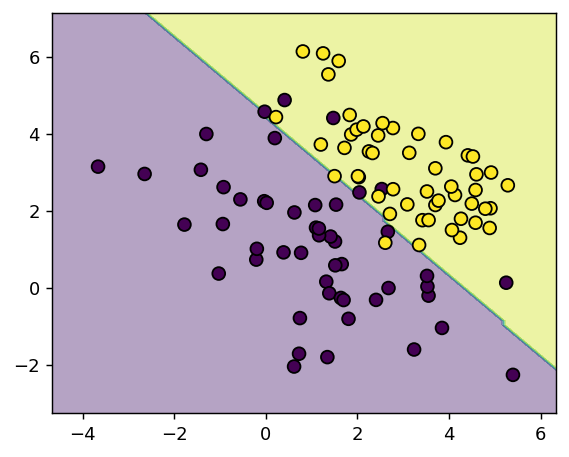

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


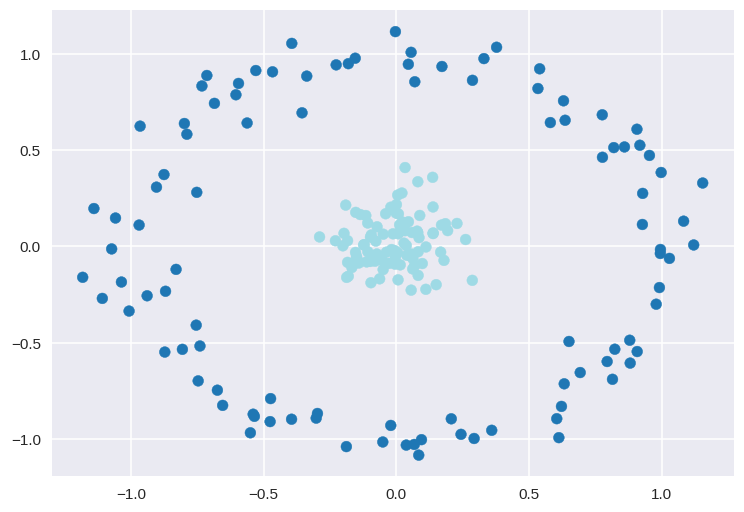

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn-v0_8")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

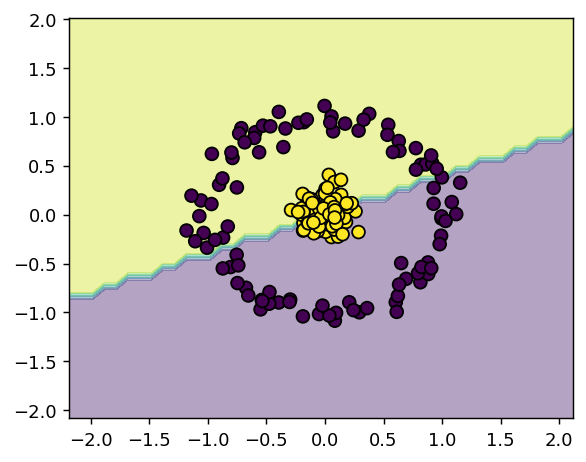

In [4]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [5]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [6]:
X_new = np.hstack((X, Z))

In [7]:
import plotly.graph_objects as go


In [8]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

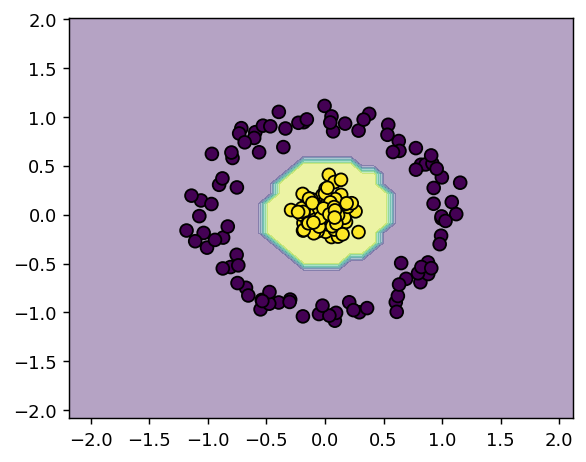

In [9]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [10]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.


Tasks:

Task-1
Try to run the same experiment after filtering different features, 2 at a time.

Task-2
Use different kinds of kernels for the SVM and plot it for Iris dataset -
1. linear
2. poly
3. rbf
4. sigmoid
5. precomputed

Learning Tasks:
Learn about SVM types, support vectors and hyperplanes.

Task-1To run the experiment with different features filtered two at a time, we can perform the following steps:

1. Select Feature Pairs: List all possible pairs of features from the dataset.


2. Filter Dataset: For each pair of features, filter the dataset to include only those two features.


3. Run Experiment: For each filtered dataset (with two features), run the same experiment you ran previously.


4. Evaluate Results: After running the experiment with each pair, compare the results.



Here is a breakdown of the process:

Step 1: Select Feature Pairs

Assuming you have a dataset with several features, we can form all unique pairs of features. If your dataset has  features, there are  possible pairs.

For example, if your dataset has the following features:

Feature 1: Age

Feature 2: Gender

Feature 3: Income

Feature 4: Education Level


The pairs would be:

(Age, Gender)

(Age, Income)

(Age, Education Level)

(Gender, Income)

(Gender, Education Level)

(Income, Education Level)


Step 2: Filter Dataset for Each Pair

For each of the pairs, create a new dataset that only includes the two selected features.

Step 3: Run the Experiment

Apply the same experiment on each filtered dataset. This could be any analysis, like a classification or regression task, based on the dataset's context.

Step 4: Evaluate Results

After running the experiment with each pair of features, evaluate the performance using metrics such as accuracy, precision, recall, or mean squared error, depending on the nature of your experiment.

If you provide a specific dataset and the experiment you want to run, I can walk you through it in more detail.

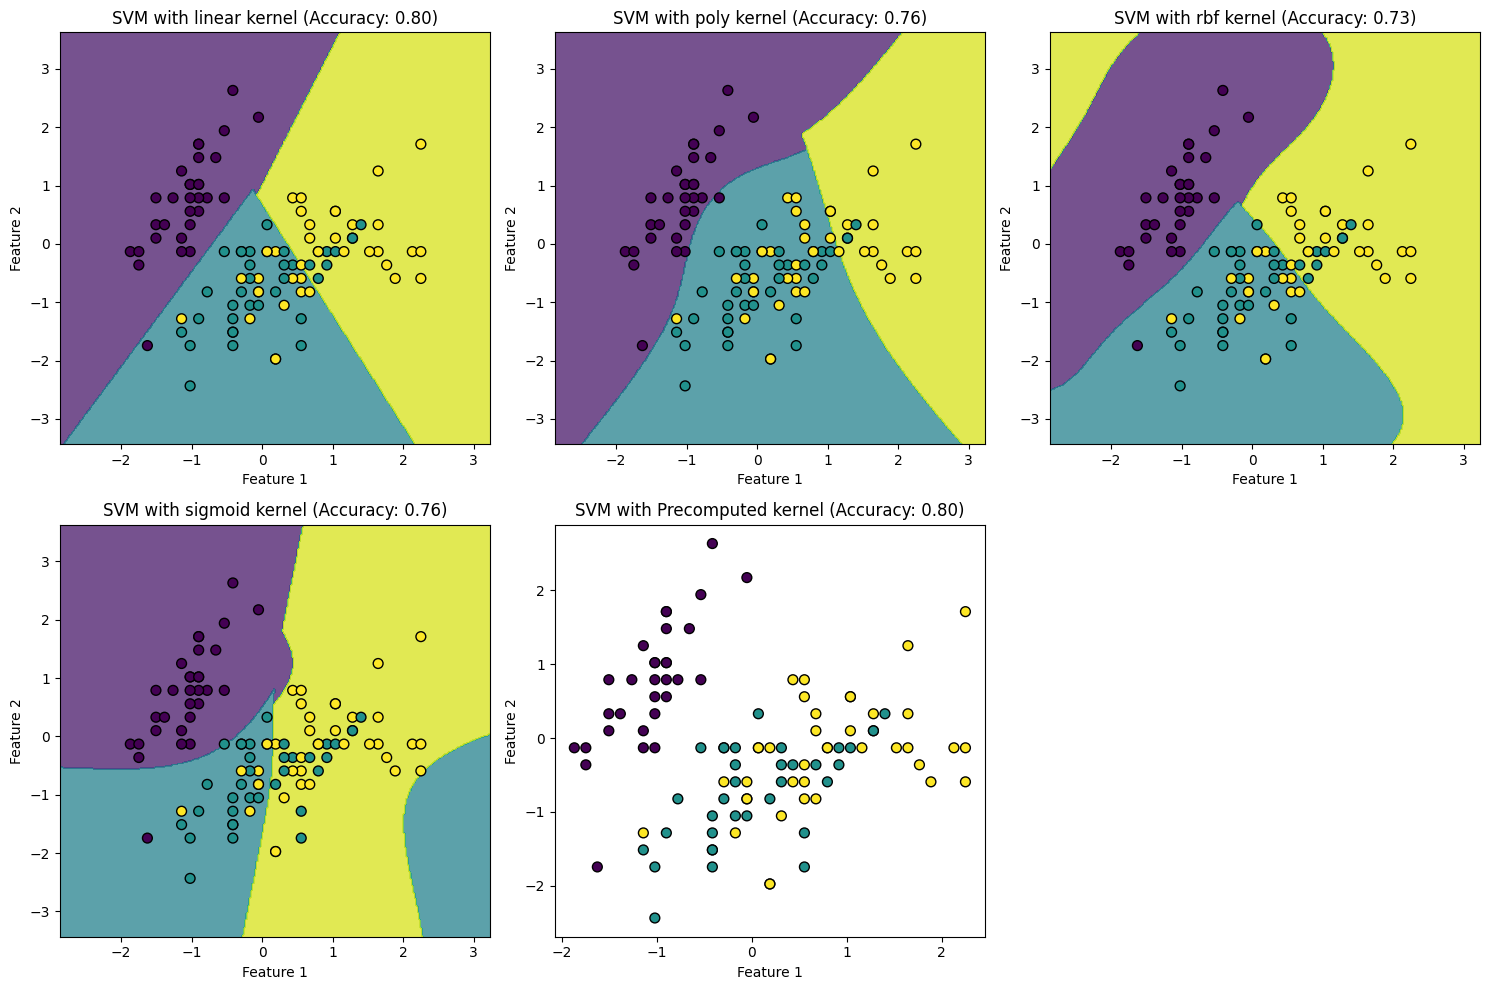

In [14]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll only use the first two features for easier visualization
y = iris.target

# Standardize the features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a plot for decision boundaries
plt.figure(figsize=(15, 10))

# Loop over different kernels
for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel, degree=3, gamma='scale')  # degree=3 for poly kernel, gamma='scale' for rbf/sigmoid
    model.fit(X_train, y_train)

    # Predict the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Create a mesh grid to plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.subplot(2, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.75)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=50)
    plt.title(f"SVM with {kernel} kernel (Accuracy: {accuracy:.2f})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Precomputed kernel (we will use a custom precomputed kernel matrix here)
K = np.dot(X_train, X_train.T)  # Using a simple dot product for precomputed kernel
model_precomputed = SVC(kernel='precomputed')
model_precomputed.fit(K, y_train)

# Predict using the precomputed kernel
K_test = np.dot(X_test, X_train.T)  # Kernel for test set
y_pred = model_precomputed.predict(K_test)
accuracy_precomputed = accuracy_score(y_test, y_pred)

# Plot the precomputed kernel result
plt.subplot(2, 3, len(kernels)+1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=50)
plt.title(f"SVM with Precomputed kernel (Accuracy: {accuracy_precomputed:.2f})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()